In [2]:
# importing all the required libraries

import pandas as pd
import seaborn as sns
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, roc_auc_score, mean_absolute_error, mean_squared_error
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
import scipy.stats as stats

from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler

#new imports from 16/07/2024
import random


In [2]:
# Mohamed reccomendations : to drop all nans > 30%
#maybe drop patients who stayed more than ~50 hours in the ICU bc is more or less the average
#maybe rescale the SatO2 also with StandardCaler?

# Data Loading

In [3]:
df = pd.read_csv('../raw_data/Dataset.csv')

# Features Selection and Data Cleaning

In [4]:
# Get list of column names
column_names = df.columns.tolist()

In [5]:
#features to drop in the dataset

total_columns = ['Unnamed: 0',
 'Hour',
 'HR',
 'O2Sat',
 'Temp',
 'SBP',
 'MAP',
 'DBP',
 'Resp',
 'EtCO2',
 'BaseExcess',
 'HCO3',
 'FiO2',
 'pH',
 'PaCO2',
 'SaO2',
 'AST',
 'BUN',
 'Alkalinephos',
 'Calcium',
 'Chloride',
 'Creatinine',
 'Bilirubin_direct',
 'Glucose',
 'Lactate',
 'Magnesium',
 'Phosphate',
 'Potassium',
 'Bilirubin_total',
 'TroponinI',
 'Hct',
 'Hgb',
 'PTT',
 'WBC',
 'Fibrinogen',
 'Platelets',
 'Age',
 'Gender',
 'Unit1',
 'Unit2',
 'HospAdmTime',
 'ICULOS',
 'SepsisLabel',
 'Patient_ID']

relevant_columns = ['Hour',
 'Age',
 'Gender',
 'Patient_ID',
 'HR',
 'O2Sat',
 'Temp',
 'SBP',
 'MAP',
 'DBP',
 'Resp',
 'BaseExcess',
 'HCO3',
 'FiO2',
 'pH',
 'AST',
'Creatinine',
 'Bilirubin_direct',
 'Bilirubin_total',
 'Glucose',
 'Lactate',
 'PTT',
 'WBC',
 'Fibrinogen',
 'Platelets',
 'SepsisLabel',
 ]

columns_for_baseline = ['Hour', 'HR','O2Sat', 'Temp','SBP', 'MAP', 'DBP', 'Resp','Age','Gender','Patient_ID','SepsisLabel']


In [6]:
df1 = df[columns_for_baseline]

In [7]:
pd.set_option('display.max_columns', None)

In [9]:
test1 = df1.loc[df1['Patient_ID'] == 17072]

def SOFA_score(df):
    sofa = 0
    if df['MAP']

In [11]:
(df1.isnull().sum()/len(df1)).sort_values(ascending=False)

Bilirubin_direct    0.998074
Fibrinogen          0.993402
Bilirubin_total     0.985092
AST                 0.983776
Lactate             0.973299
PTT                 0.970559
HCO3                0.958106
BaseExcess          0.945790
Platelets           0.940595
Creatinine          0.939044
WBC                 0.935932
pH                  0.930697
FiO2                0.916658
Glucose             0.828943
Temp                0.661627
DBP                 0.313459
Resp                0.153546
SBP                 0.145770
O2Sat               0.130611
MAP                 0.124513
HR                  0.098826
Age                 0.000000
Patient_ID          0.000000
Gender              0.000000
Hour                0.000000
SepsisLabel         0.000000
dtype: float64

<Axes: xlabel='Hour', ylabel='Count'>

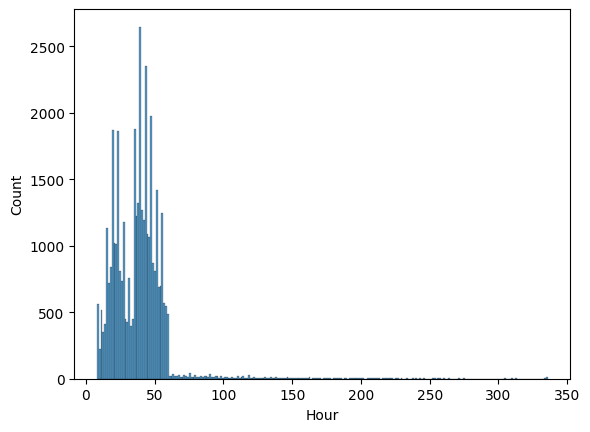

In [12]:
sns.histplot(df1.groupby('Patient_ID').Hour.count().sort_values())

# fix this as is not filtered by patient, do interpolate instead of bfill and ffill

In [8]:
final_df.Patient_ID = final_df.Patient_ID.astype("int")

df_filled = final_df.groupby('Patient_ID', group_keys=False).apply(
    lambda group: group.interpolate().bfill().ffill()
).reset_index(drop=False)

NameError: name 'final_df' is not defined

: 

In [35]:
df_filled.head(50)

,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,Age,Gender,Patient_ID,SepsisLabel
0,0,65.0,100.0,35.780000,129.000000,72.00,69.000000,16.50,68.54,0,17072,0
1,1,65.0,100.0,35.780000,129.000000,72.00,69.000000,16.50,68.54,0,17072,0
2,2,78.0,100.0,35.780000,129.000000,42.50,69.000000,16.75,68.54,0,17072,0
3,3,73.0,100.0,35.780000,129.000000,58.25,69.000000,17.00,68.54,0,17072,0
4,4,70.0,100.0,35.780000,129.000000,74.00,69.000000,14.00,68.54,0,17072,0
5,5,62.0,100.0,35.780000,124.000000,85.00,61.000000,14.00,68.54,0,17072,0
6,6,61.0,100.0,35.780000,101.000000,75.00,58.000000,14.00,68.54,0,17072,0
7,7,68.0,100.0,35.780000,142.000000,93.50,78.000000,16.00,68.54,0,17072,0
8,8,71.0,100.0,35.932500,121.000000,74.00,91.000000,14.00,68.54,0,17072,0
9,9,69.0,100.0,36.085000,120.000000,79.00,98.000000,14.00,68.54,0,17072,0


# Data Scaling

In [15]:
relevant_columns

['Hour',
 'Age',
 'Gender',
 'Patient_ID',
 'HR',
 'O2Sat',
 'Temp',
 'SBP',
 'MAP',
 'DBP',
 'Resp',
 'BaseExcess',
 'HCO3',
 'FiO2',
 'pH',
 'AST',
 'Creatinine',
 'Bilirubin_direct',
 'Bilirubin_total',
 'Glucose',
 'Lactate',
 'PTT',
 'WBC',
 'Fibrinogen',
 'Platelets',
 'SepsisLabel']

In [36]:
columns_to_scale = ['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp','Age']
#columns_to_scale = relevant_columns

<Axes: xlabel='Resp', ylabel='Count'>

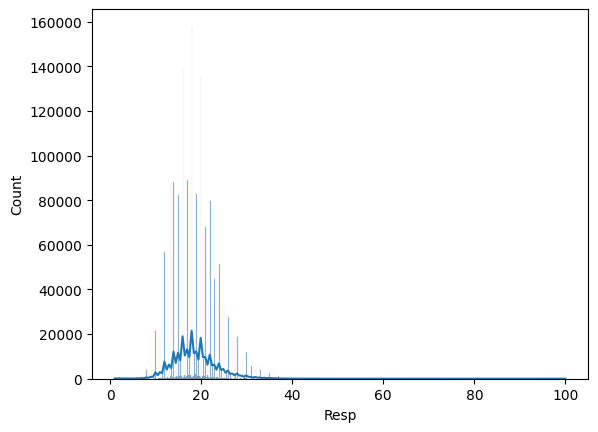

In [17]:
sns.histplot(df_filled['Resp'], kde=True)

In [37]:
# Initialize the scalers
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

# Apply MinMaxScaler to the O2Sat column
df_filled['O2Sat'] = min_max_scaler.fit_transform(df_filled[['O2Sat']])

# Apply StandardScaler to the rest of the columns
columns_to_standardize = [col for col in columns_to_scale if col != 'O2Sat']
df_filled[columns_to_standardize] = standard_scaler.fit_transform(df_filled[columns_to_standardize])


In [81]:
df_filled = df_filled.set_index('Patient_ID')

# Tabular Data Shifting

In [82]:
features_df = df_filled.drop(columns = ['Hour','Age','Gender','SepsisLabel'])
to_add_df = df_filled[['Hour','Age','Gender','SepsisLabel']]

In [83]:
balanced_shifted_df = pd.concat([

                    features_df,
                    features_df.groupby(features_df.index).shift(1).add_suffix('_1'),
                    features_df.groupby(features_df.index).shift(2).add_suffix('_2'),
                    features_df.groupby(features_df.index).shift(3).add_suffix('_3'),
                    features_df.groupby(features_df.index).shift(4).add_suffix('_4'),
                    features_df.groupby(features_df.index).shift(5).add_suffix('_5'),
                    to_add_df],
                    axis=1
)

: 

In [ ]:
balanced_shifted_cleaned_df = balanced_shifted_df.dropna()

# Balancing Dataset

In [39]:
# Filter patient IDs where at some point sepsis label is 1
sepsis_patients_ids = list(set(df_filled.loc[df_filled['SepsisLabel'] == 1, 'Patient_ID'].tolist()))

In [40]:
# Get unique Patient_IDs from df_encoded
all_patient_ids = set(df_filled['Patient_ID'])
# Find Patient_IDs not in sepsis_patients_ids
no_sepsis_patients_ids = list(all_patient_ids - set(sepsis_patients_ids))

In [41]:
#Now we have the list with the ID's with patients that had sepsis and patients which doesn't
len(sepsis_patients_ids), len(no_sepsis_patients_ids)

(2932, 37404)

In [42]:
non_sepsis_selected_patients_ids = random.sample(no_sepsis_patients_ids, 4000)

In [43]:
non_sepsis_selected_df = df_filled.loc[df_filled['Patient_ID'].isin(non_sepsis_selected_patients_ids)]
sepsis_selected_df = df_filled.loc[df_filled['Patient_ID'].isin(sepsis_patients_ids)]

In [ ]:
non_sepsis_selected_df

In [77]:
df_1s = sepsis_selected_df.query('SepsisLabel == 1').sample(frac=1)
df_0s_sepsis = sepsis_selected_df.query('SepsisLabel == 0').sample(frac=0.2)
df_0s_nonsepsis = non_sepsis_selected_df.query('SepsisLabel == 0').sample(frac=0.2)
df_lr_balanced = pd.concat([df_1s,df_0s_sepsis,df_0s_nonsepsis]).sample(frac=1)


In [78]:
len(df_1s)+len(df_0s_sepsis)+len(df_0s_nonsepsis)

86370

In [79]:
df_lr_balanced


,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,Age,Gender,Patient_ID,SepsisLabel
1297286,14,0.907484,0.950000,0.075623,0.843335,1.380991,1.227082,0.264392,-0.793928,0,113865,0
1398056,26,-0.896518,0.950000,-1.851478,1.369791,1.876896,1.077085,-0.134051,1.342014,1,118863,0
534187,25,-1.594841,0.962500,-1.910208,-1.503783,-1.656428,-1.622874,-0.731717,0.726253,0,1955,0
456091,21,0.180064,0.987500,0.195706,-1.613462,-1.532451,-1.322879,-0.831328,0.211796,1,1461,1
215808,13,1.373033,0.937500,-0.280432,0.009779,-0.458197,-1.363419,1.260502,-0.164130,1,4420,0
...,...,...,...,...,...,...,...,...,...,...,...,...
703047,13,-0.140001,1.000000,2.112844,-0.363128,-0.354677,-0.647889,0.264392,1.094855,0,12702,0
845814,40,0.616516,0.925000,1.819190,-0.385063,0.699122,1.302081,-0.134051,0.731745,1,113894,0
710407,72,0.865917,0.995833,-0.280432,0.389997,0.433458,0.134242,1.288962,0.818403,1,6022,0
628184,14,-1.653034,1.000000,-1.443160,0.229136,0.637134,0.402095,-0.532495,0.250243,1,12619,1


# Tabular Data Shifting for 1rst Baseline Model Approach

In [68]:
features_df = df_lr_balanced.drop(columns = ['Hour','Age','Gender','SepsisLabel'])
to_add_df = df_lr_balanced[['Hour','Age','Gender','SepsisLabel']]

In [69]:
balanced_shifted_df = pd.concat([

                    features_df,
                    features_df.groupby(features_df.index).shift(1).add_suffix('_1'),
                    features_df.groupby(features_df.index).shift(2).add_suffix('_2'),
                    features_df.groupby(features_df.index).shift(3).add_suffix('_3'),
                    features_df.groupby(features_df.index).shift(4).add_suffix('_4'),
                    features_df.groupby(features_df.index).shift(5).add_suffix('_5'),
                    to_add_df],
                    axis=1
)

In [70]:
pd.set_option('display.max_columns', None)

In [73]:
balanced_shifted_df

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,HR_1,O2Sat_1,Temp_1,SBP_1,MAP_1,DBP_1,Resp_1,HR_2,O2Sat_2,Temp_2,SBP_2,MAP_2,DBP_2,Resp_2,HR_3,O2Sat_3,Temp_3,SBP_3,MAP_3,DBP_3,Resp_3,HR_4,O2Sat_4,Temp_4,SBP_4,MAP_4,DBP_4,Resp_4,HR_5,O2Sat_5,Temp_5,SBP_5,MAP_5,DBP_5,Resp_5,Hour,Age,Gender,SepsisLabel
Patient_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
116564,0.267354,0.9625,-0.897104,-0.736034,-0.478653,-0.647889,-0.532495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,0.426611,0,1
11093,0.558322,1.0000,-0.931746,-1.745076,-1.284499,-0.797887,-0.333273,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57,-0.166571,1,1
53,0.150967,0.8750,1.672364,-0.619044,-0.850582,-0.198378,0.264392,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,0.401590,0,1
650,-0.081807,0.9375,-0.654840,0.404621,0.327193,0.252097,0.065171,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51,-0.464382,1,1
111823,1.373033,0.9875,1.613633,0.141393,0.699122,0.477094,1.260502,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,-2.563708,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119061,2.740582,0.9750,0.938230,0.316878,0.637134,0.552092,-0.333273,1.140258,1.0000,0.938230,1.325920,1.071050,0.777089,0.862058,0.383741,1.00,2.112844,0.229136,0.451169,0.402095,-0.373118,0.383741,1.00000,1.525537,0.711721,0.699122,0.177098,-0.532495,0.383741,1.0000,1.966017,0.229136,0.451169,0.327096,-0.333273,0.296451,1.00000,1.819190,0.229136,0.141228,-0.197896,-0.532495,37,0.243530,0,0
14488,1.140258,0.9125,-0.609324,-1.788947,-1.780404,-1.772872,0.662836,0.441935,0.9875,-0.981529,-1.481847,-1.160522,-0.797887,-0.532495,1.198452,0.95,-0.471306,-0.867648,-0.478653,0.027100,0.463614,1.023871,0.97500,-1.469728,-0.911520,-0.540641,-0.197896,0.463614,1.314839,0.9125,2.152697,-1.416040,-1.656428,-0.797887,-0.930939,1.140258,0.98750,-0.853056,-1.613462,-1.408475,-1.097882,-0.134051,17,-0.946495,0,0
110182,-1.507550,0.9625,-0.383210,0.623978,-0.029239,-0.122897,-1.130161,-1.303873,0.9875,-0.383210,1.457534,1.071050,1.377080,-1.329383,-1.071098,1.00,-0.383210,0.316878,-0.044736,0.252097,-0.731717,-1.332970,0.99375,-0.493330,1.150434,0.575145,0.852088,-0.233662,-1.478454,0.9750,-0.471306,0.799463,-0.230700,-0.422893,-1.130161,-0.954711,0.99375,-0.383210,0.536235,-0.044736,0.327096,-0.831328,26,-0.732901,0,0


In [75]:
balanced_shifted_cleaned_df = balanced_shifted_df.dropna()

In [76]:
balanced_shifted_cleaned_df

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,HR_1,O2Sat_1,Temp_1,SBP_1,MAP_1,DBP_1,Resp_1,HR_2,O2Sat_2,Temp_2,SBP_2,MAP_2,DBP_2,Resp_2,HR_3,O2Sat_3,Temp_3,SBP_3,MAP_3,DBP_3,Resp_3,HR_4,O2Sat_4,Temp_4,SBP_4,MAP_4,DBP_4,Resp_4,HR_5,O2Sat_5,Temp_5,SBP_5,MAP_5,DBP_5,Resp_5,Hour,Age,Gender,SepsisLabel
Patient_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
14795,-0.430969,0.88750,-1.005756,-1.106410,-1.222511,0.328476,0.662836,-0.198194,0.97500,-1.097767,-1.765886,-0.540641,-0.103112,1.260502,0.965677,0.8750,-0.001461,-0.516677,-0.602629,-0.797887,1.260502,-0.256388,0.87500,-1.910208,-0.702850,-0.788594,0.592583,2.256612,-0.198194,0.937500,-1.645920,-0.693007,-0.478653,0.599024,2.655056,-0.023614,0.925000,-1.221958,-0.633949,-0.540641,0.637674,0.662836,227,0.133071,0,0
6133,0.791097,0.93125,-0.199677,-0.225275,-0.726605,-0.401425,0.264392,2.071356,0.92500,-1.594531,-0.247613,0.203217,-0.391109,1.061280,0.907484,0.9375,-1.708322,-0.237953,0.451169,-0.395570,0.065171,1.664001,0.90000,-1.321066,-0.309798,-0.726605,-0.362392,0.463614,1.450624,0.988889,0.644577,-0.336362,-0.712830,-0.350124,0.530022,1.052968,0.931250,-0.159300,-0.224671,-0.292689,-0.401703,0.065171,25,0.371076,1,0
6133,0.500129,0.92500,-1.326572,-0.250028,0.265205,-0.389994,0.662836,0.791097,0.93125,-0.199677,-0.225275,-0.726605,-0.401425,0.264392,2.071356,0.9250,-1.594531,-0.247613,0.203217,-0.391109,1.061280,0.907484,0.93750,-1.708322,-0.237953,0.451169,-0.395570,0.065171,1.664001,0.900000,-1.321066,-0.309798,-0.726605,-0.362392,0.463614,1.450624,0.988889,0.644577,-0.336362,-0.712830,-0.350124,0.530022,66,0.371076,1,0
8035,-0.140001,0.97500,-0.625475,-0.121835,0.575145,0.285228,-0.333273,0.558322,0.95000,-1.102661,0.316878,-0.044736,-0.267434,1.061280,1.431226,0.9125,-0.816349,1.720762,-0.044736,-0.123261,2.057390,-0.081807,0.96250,-0.126264,0.623978,0.327193,0.012902,0.463614,-1.012905,1.000000,-1.480740,-0.253449,-0.664617,-0.315491,-0.930939,-0.140001,0.900000,0.116000,0.580107,0.823098,-0.003118,0.065171,167,0.394877,1,0
106969,-0.110904,0.99375,1.378710,0.711721,1.009062,0.702090,0.065171,-0.605550,1.00000,1.378710,0.755592,1.319003,1.302081,0.264392,0.354645,1.0000,1.378710,-1.021198,-1.036546,-1.022884,-2.701801,-0.605550,0.92500,0.497750,-0.999262,-0.416665,-0.647889,1.061280,3.351615,0.912500,0.938230,0.273007,0.389181,0.177098,1.459724,-1.478454,1.000000,1.085057,1.238177,1.071050,0.477094,-3.421213,144,1.158934,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18692,0.791097,0.98750,4.168418,1.896248,0.761110,0.327096,-0.731717,0.500129,0.95625,2.077606,0.294943,-0.137718,-0.497892,-0.632106,1.314839,0.9125,2.729516,1.150434,0.327193,0.027100,-0.532495,0.732903,0.98750,2.572901,1.413663,0.327193,0.027100,-0.731717,1.140258,1.000000,3.874765,2.115604,1.040056,0.702090,-0.731717,1.314839,1.000000,2.494593,3.344003,2.124849,1.452079,-0.532495,6,-0.559584,1,1
119061,2.740582,0.97500,0.938230,0.316878,0.637134,0.552092,-0.333273,1.140258,1.00000,0.938230,1.325920,1.071050,0.777089,0.862058,0.383741,1.0000,2.112844,0.229136,0.451169,0.402095,-0.373118,0.383741,1.00000,1.525537,0.711721,0.699122,0.177098,-0.532495,0.383741,1.000000,1.966017,0.229136,0.451169,0.327096,-0.333273,0.296451,1.000000,1.819190,0.229136,0.141228,-0.197896,-0.532495,37,0.243530,0,0
14488,1.140258,0.91250,-0.609324,-1.788947,-1.780404,-1.772872,0.662836,0.441935,0.98750,-0.981529,-1.481847,-1.160522,-0.797887,-0.532495,1.198452,0.9500,-0.471306,-0.867648,-0.478653,0.027100,0.463614,1.023871,0.97500,-1.469728,-0.911520,-0.540641,-0.197896,0.463614,1.314839,0.912500,2.152697,-1.416040,-1.656428,-0.797887,-0.930939,1.140258,0.987500,-0.853056,-1.613462,-1.408475,-1.097882,-0.134051,17,-0.946495,0,0


In [ ]:
log_reg_df = balanced_shifted_cleaned_df.drop('Hour',axis=1)

In [ ]:
log_reg_df

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,HR_1,O2Sat_1,Temp_1,SBP_1,MAP_1,DBP_1,Resp_1,HR_2,O2Sat_2,Temp_2,SBP_2,MAP_2,DBP_2,Resp_2,HR_3,O2Sat_3,Temp_3,SBP_3,MAP_3,DBP_3,Resp_3,HR_4,O2Sat_4,Temp_4,SBP_4,MAP_4,DBP_4,Resp_4,HR_5,O2Sat_5,Temp_5,SBP_5,MAP_5,DBP_5,Resp_5,Age,Gender,SepsisLabel
Patient_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
107857,-0.809227,0.95000,-0.774748,-1.240555,-0.788594,-0.647889,-0.333273,-0.896518,0.9500,-0.823691,-1.437976,-0.974558,-0.722888,-0.333273,-0.576453,0.93750,-0.530037,-0.911520,-0.230700,-0.010399,-0.134051,0.558322,1.00000,-0.236384,0.009779,0.327193,0.027100,2.256612,1.402129,1.00000,0.057270,1.567212,1.442979,1.114584,1.858168,0.572871,0.95000,0.350923,0.963981,0.988400,0.495843,1.459724,0.975853,0,1
107857,-0.780130,0.97500,-0.725806,-0.648292,-0.292689,-0.422893,-0.731717,-0.809227,0.9500,-0.774748,-1.240555,-0.788594,-0.647889,-0.333273,-0.896518,0.95000,-0.823691,-1.437976,-0.974558,-0.722888,-0.333273,-0.576453,0.93750,-0.530037,-0.911520,-0.230700,-0.010399,-0.134051,0.558322,1.00000,-0.236384,0.009779,0.327193,0.027100,2.256612,1.402129,1.00000,0.057270,1.567212,1.442979,1.114584,1.858168,0.975853,0,1
107857,-0.721937,0.98750,-0.676864,0.053650,0.389181,0.102099,-0.532495,-0.780130,0.9750,-0.725806,-0.648292,-0.292689,-0.422893,-0.731717,-0.809227,0.95000,-0.774748,-1.240555,-0.788594,-0.647889,-0.333273,-0.896518,0.95000,-0.823691,-1.437976,-0.974558,-0.722888,-0.333273,-0.576453,0.93750,-0.530037,-0.911520,-0.230700,-0.010399,-0.134051,0.558322,1.00000,-0.236384,0.009779,0.327193,0.027100,2.256612,0.975853,0,1
101498,-0.838324,0.97500,-0.530037,-0.692163,0.110234,0.477094,0.264392,-1.449357,0.9875,-0.530037,-0.428935,0.389181,0.664591,0.264392,-1.362066,0.99375,-0.530037,0.229136,0.885086,0.964586,-0.233662,-0.896518,0.96875,-0.530037,0.887206,1.349997,1.377080,0.065171,-1.362066,0.97500,-0.530037,0.931078,1.504967,1.377080,0.264392,-0.663743,0.95625,-0.970517,-0.012157,0.699122,0.889587,0.563225,-0.488793,0,0
101498,-1.216582,0.95625,-0.530037,-0.648292,0.048246,0.402095,-0.233662,-0.838324,0.9750,-0.530037,-0.692163,0.110234,0.477094,0.264392,-1.449357,0.98750,-0.530037,-0.428935,0.389181,0.664591,0.264392,-1.362066,0.99375,-0.530037,0.229136,0.885086,0.964586,-0.233662,-0.896518,0.96875,-0.530037,0.887206,1.349997,1.377080,0.065171,-1.362066,0.97500,-0.530037,0.931078,1.504967,1.377080,0.264392,-0.488793,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12591,0.209161,0.98750,0.861146,-2.008304,-1.718416,-0.090755,0.065171,0.441935,0.9500,0.695966,-1.306362,-0.788594,-0.110397,0.662836,0.325548,0.96250,0.530786,-1.437976,-1.098534,-0.130040,0.264392,-0.314582,0.95000,0.365606,-1.832818,-1.656428,-0.149683,0.463614,0.034580,0.96250,0.365606,-1.767011,-1.439469,-0.169325,1.061280,-0.256388,0.96250,0.365606,-1.701204,-1.222511,-0.188968,0.463614,0.532187,0,1
12591,0.209161,1.00000,1.026326,-0.911520,-0.726605,-0.071112,0.164782,0.209161,0.9875,0.861146,-2.008304,-1.718416,-0.090755,0.065171,0.441935,0.95000,0.695966,-1.306362,-0.788594,-0.110397,0.662836,0.325548,0.96250,0.530786,-1.437976,-1.098534,-0.130040,0.264392,-0.314582,0.95000,0.365606,-1.832818,-1.656428,-0.149683,0.463614,0.034580,0.96250,0.365606,-1.767011,-1.439469,-0.169325,1.061280,0.532187,0,1
12591,0.412838,1.00000,0.861880,-1.547654,-1.315493,-0.051470,0.662836,0.209161,1.0000,1.026326,-0.911520,-0.726605,-0.071112,0.164782,0.209161,0.98750,0.861146,-2.008304,-1.718416,-0.090755,0.065171,0.441935,0.95000,0.695966,-1.306362,-0.788594,-0.110397,0.662836,0.325548,0.96250,0.530786,-1.437976,-1.098534,-0.130040,0.264392,-0.314582,0.95000,0.365606,-1.832818,-1.656428,-0.149683,0.463614,0.532187,0,1


# Data Split

In [ ]:
# Split the data into training and testing sets, we have 5545 patients for train and 1386 for test so a total of 1386 + 5545 = 6931 patients
split_point = int(0.8 * len(patient_ids))  # 80% train, 20% test
split_point

5545

In [ ]:
train_ids = patient_ids[:split_point]
test_ids = patient_ids[split_point:]

In [ ]:
train_df = log_reg_df.loc[log_reg_df.index.isin(train_ids)]
test_df = log_reg_df.loc[log_reg_df.index.isin(test_ids)]


In [ ]:
train_df

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,HR_1,O2Sat_1,Temp_1,SBP_1,MAP_1,DBP_1,Resp_1,HR_2,O2Sat_2,Temp_2,SBP_2,MAP_2,DBP_2,Resp_2,HR_3,O2Sat_3,Temp_3,SBP_3,MAP_3,DBP_3,Resp_3,HR_4,O2Sat_4,Temp_4,SBP_4,MAP_4,DBP_4,Resp_4,HR_5,O2Sat_5,Temp_5,SBP_5,MAP_5,DBP_5,Resp_5,Age,Gender,SepsisLabel
Patient_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
107857,-0.809227,0.95000,-0.774748,-1.240555,-0.788594,-0.647889,-0.333273,-0.896518,0.95000,-0.823691,-1.437976,-0.974558,-0.722888,-0.333273,-0.576453,0.93750,-0.530037,-0.911520,-0.230700,-0.010399,-0.134051,0.558322,1.00000,-0.236384,0.009779,0.327193,0.027100,2.256612,1.402129,1.00000,0.057270,1.567212,1.442979,1.114584,1.858168,0.572871,0.95000,0.350923,0.963981,0.988400,0.495843,1.459724,0.975853,0,1
107857,-0.780130,0.97500,-0.725806,-0.648292,-0.292689,-0.422893,-0.731717,-0.809227,0.95000,-0.774748,-1.240555,-0.788594,-0.647889,-0.333273,-0.896518,0.95000,-0.823691,-1.437976,-0.974558,-0.722888,-0.333273,-0.576453,0.93750,-0.530037,-0.911520,-0.230700,-0.010399,-0.134051,0.558322,1.00000,-0.236384,0.009779,0.327193,0.027100,2.256612,1.402129,1.00000,0.057270,1.567212,1.442979,1.114584,1.858168,0.975853,0,1
107857,-0.721937,0.98750,-0.676864,0.053650,0.389181,0.102099,-0.532495,-0.780130,0.97500,-0.725806,-0.648292,-0.292689,-0.422893,-0.731717,-0.809227,0.95000,-0.774748,-1.240555,-0.788594,-0.647889,-0.333273,-0.896518,0.95000,-0.823691,-1.437976,-0.974558,-0.722888,-0.333273,-0.576453,0.93750,-0.530037,-0.911520,-0.230700,-0.010399,-0.134051,0.558322,1.00000,-0.236384,0.009779,0.327193,0.027100,2.256612,0.975853,0,1
101498,-0.838324,0.97500,-0.530037,-0.692163,0.110234,0.477094,0.264392,-1.449357,0.98750,-0.530037,-0.428935,0.389181,0.664591,0.264392,-1.362066,0.99375,-0.530037,0.229136,0.885086,0.964586,-0.233662,-0.896518,0.96875,-0.530037,0.887206,1.349997,1.377080,0.065171,-1.362066,0.97500,-0.530037,0.931078,1.504967,1.377080,0.264392,-0.663743,0.95625,-0.970517,-0.012157,0.699122,0.889587,0.563225,-0.488793,0,0
101498,-1.216582,0.95625,-0.530037,-0.648292,0.048246,0.402095,-0.233662,-0.838324,0.97500,-0.530037,-0.692163,0.110234,0.477094,0.264392,-1.449357,0.98750,-0.530037,-0.428935,0.389181,0.664591,0.264392,-1.362066,0.99375,-0.530037,0.229136,0.885086,0.964586,-0.233662,-0.896518,0.96875,-0.530037,0.887206,1.349997,1.377080,0.065171,-1.362066,0.97500,-0.530037,0.931078,1.504967,1.377080,0.264392,-0.488793,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14600,0.034580,1.00000,-0.221701,1.194306,0.265205,-0.047898,0.662836,-0.081807,0.95000,-0.485989,1.808505,0.265205,-0.047898,0.264392,-1.012905,1.00000,-0.750277,1.633019,0.327193,0.327096,-0.134051,-0.372775,0.96250,-1.014565,1.062692,-0.230700,-0.572890,0.662836,-0.896518,1.00000,-1.036589,0.667849,0.079240,0.177098,-0.134051,-0.489162,0.97500,-1.058613,-0.253449,-0.230700,0.177098,-0.532495,-1.094790,1,0
14600,0.907484,0.93750,0.042587,0.580107,-0.106724,-0.272895,0.662836,0.034580,1.00000,-0.221701,1.194306,0.265205,-0.047898,0.662836,-0.081807,0.95000,-0.485989,1.808505,0.265205,-0.047898,0.264392,-1.012905,1.00000,-0.750277,1.633019,0.327193,0.327096,-0.134051,-0.372775,0.96250,-1.014565,1.062692,-0.230700,-0.572890,0.662836,-0.896518,1.00000,-1.036589,0.667849,0.079240,0.177098,-0.134051,-1.094790,1,0
14600,0.791097,0.96875,-0.130668,0.755592,0.048246,-0.197896,0.364003,0.907484,0.93750,0.042587,0.580107,-0.106724,-0.272895,0.662836,0.034580,1.00000,-0.221701,1.194306,0.265205,-0.047898,0.662836,-0.081807,0.95000,-0.485989,1.808505,0.265205,-0.047898,0.264392,-1.012905,1.00000,-0.750277,1.633019,0.327193,0.327096,-0.134051,-0.372775,0.96250,-1.014565,1.062692,-0.230700,-0.572890,0.662836,-1.094790,1,0


# Baseline Model Logistic Regression 1rst approach

In [ ]:
X_train = train_df.drop('SepsisLabel',axis=1)
y_train = train_df['SepsisLabel']

NameError: name 'X_test' is not defined

In [ ]:
X_test = test_df.drop('SepsisLabel',axis=1)
y_test = test_df['SepsisLabel']

In [ ]:
X_test

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,HR_1,O2Sat_1,Temp_1,SBP_1,MAP_1,DBP_1,Resp_1,HR_2,O2Sat_2,Temp_2,SBP_2,MAP_2,DBP_2,Resp_2,HR_3,O2Sat_3,Temp_3,SBP_3,MAP_3,DBP_3,Resp_3,HR_4,O2Sat_4,Temp_4,SBP_4,MAP_4,DBP_4,Resp_4,HR_5,O2Sat_5,Temp_5,SBP_5,MAP_5,DBP_5,Resp_5,Age,Gender
Patient_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
111040,-0.198194,0.9500,0.387630,0.711721,1.752920,2.127069,0.065171,0.441935,0.9625,0.405983,1.347856,1.411985,0.964586,-0.134051,0.471032,0.9625,0.424337,1.764633,2.372801,2.352065,-0.532495,-0.256388,0.9625,0.442690,1.325920,1.876896,1.677075,-0.532495,0.092773,0.9750,0.461043,1.808505,2.620754,2.652061,-0.532495,-0.169098,0.96875,0.479397,0.887206,1.195027,1.189583,-0.432884,-1.709331,1
111040,0.150967,0.9750,0.369277,1.413663,2.186837,2.052070,0.264392,-0.198194,0.9500,0.387630,0.711721,1.752920,2.127069,0.065171,0.441935,0.9625,0.405983,1.347856,1.411985,0.964586,-0.134051,0.471032,0.9625,0.424337,1.764633,2.372801,2.352065,-0.532495,-0.256388,0.9625,0.442690,1.325920,1.876896,1.677075,-0.532495,0.092773,0.97500,0.461043,1.808505,2.620754,2.652061,-0.532495,-1.709331,1
111040,-0.140001,0.9750,0.350923,1.413663,1.690932,1.677075,0.264392,0.150967,0.9750,0.369277,1.413663,2.186837,2.052070,0.264392,-0.198194,0.9500,0.387630,0.711721,1.752920,2.127069,0.065171,0.441935,0.9625,0.405983,1.347856,1.411985,0.964586,-0.134051,0.471032,0.9625,0.424337,1.764633,2.372801,2.352065,-0.532495,-0.256388,0.96250,0.442690,1.325920,1.876896,1.677075,-0.532495,-1.709331,1
111040,0.674709,0.9875,0.167390,2.027862,2.806718,2.727059,0.264392,-0.140001,0.9750,0.350923,1.413663,1.690932,1.677075,0.264392,0.150967,0.9750,0.369277,1.413663,2.186837,2.052070,0.264392,-0.198194,0.9500,0.387630,0.711721,1.752920,2.127069,0.065171,0.441935,0.9625,0.405983,1.347856,1.411985,0.964586,-0.134051,0.471032,0.96250,0.424337,1.764633,2.372801,2.352065,-0.532495,-1.709331,1
111040,0.092773,0.9875,-0.016144,1.501405,2.496778,2.652061,1.061280,0.674709,0.9875,0.167390,2.027862,2.806718,2.727059,0.264392,-0.140001,0.9750,0.350923,1.413663,1.690932,1.677075,0.264392,0.150967,0.9750,0.369277,1.413663,2.186837,2.052070,0.264392,-0.198194,0.9500,0.387630,0.711721,1.752920,2.127069,0.065171,0.441935,0.96250,0.405983,1.347856,1.411985,0.964586,-0.134051,-1.709331,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12591,0.209161,0.9875,0.861146,-2.008304,-1.718416,-0.090755,0.065171,0.441935,0.9500,0.695966,-1.306362,-0.788594,-0.110397,0.662836,0.325548,0.9625,0.530786,-1.437976,-1.098534,-0.130040,0.264392,-0.314582,0.9500,0.365606,-1.832818,-1.656428,-0.149683,0.463614,0.034580,0.9625,0.365606,-1.767011,-1.439469,-0.169325,1.061280,-0.256388,0.96250,0.365606,-1.701204,-1.222511,-0.188968,0.463614,0.532187,0
12591,0.209161,1.0000,1.026326,-0.911520,-0.726605,-0.071112,0.164782,0.209161,0.9875,0.861146,-2.008304,-1.718416,-0.090755,0.065171,0.441935,0.9500,0.695966,-1.306362,-0.788594,-0.110397,0.662836,0.325548,0.9625,0.530786,-1.437976,-1.098534,-0.130040,0.264392,-0.314582,0.9500,0.365606,-1.832818,-1.656428,-0.149683,0.463614,0.034580,0.96250,0.365606,-1.767011,-1.439469,-0.169325,1.061280,0.532187,0
12591,0.412838,1.0000,0.861880,-1.547654,-1.315493,-0.051470,0.662836,0.209161,1.0000,1.026326,-0.911520,-0.726605,-0.071112,0.164782,0.209161,0.9875,0.861146,-2.008304,-1.718416,-0.090755,0.065171,0.441935,0.9500,0.695966,-1.306362,-0.788594,-0.110397,0.662836,0.325548,0.9625,0.530786,-1.437976,-1.098534,-0.130040,0.264392,-0.314582,0.95000,0.365606,-1.832818,-1.656428,-0.149683,0.463614,0.532187,0


In [ ]:
# Initialize the Logistic Regression model
model = LogisticRegression(random_state=42, max_iter=300)

# Perform cross-validation and print recall scores
cv_recall_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='recall')
print(f"Cross-Validation Recall Scores: {cv_recall_scores}")
print(f"Mean Cross-Validation Recall Score: {cv_recall_scores.mean()}")

# Train the model on the entire training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate recall on the test data
test_recall = recall_score(y_test, y_pred)
print(f"Test Recall Score: {test_recall}")

Cross-Validation Recall Scores: [0.         0.         0.         0.         0.00049714]
Mean Cross-Validation Recall Score: 9.942828734775042e-05
Test Recall Score: 0.0


In [ ]:
# Get the predicted probabilities on the test data
y_pred_proba = model.predict_proba(X_test)

# Print the predicted probabilities for the positive class (assuming positive class is labeled as 1)
positive_class_proba = y_pred_proba[:, 1]
print(f"Predicted Probabilities for the Positive Class: {positive_class_proba}")

Predicted Probabilities for the Positive Class: [0.05700667 0.05800278 0.05764423 ... 0.12075946 0.10682699 0.1090253 ]


<Axes: ylabel='Count'>

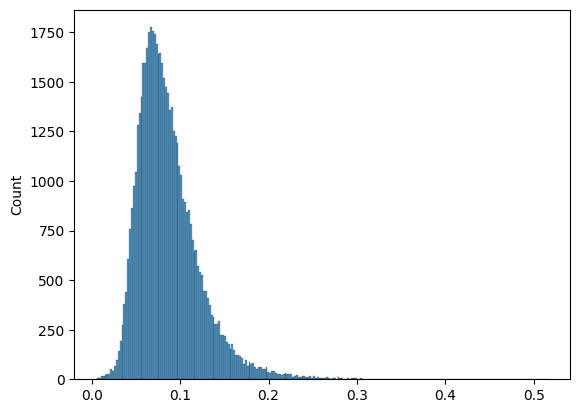

In [ ]:
sns.histplot(positive_class_proba)